# Основные пляски

In [2]:
import processing as pr
from filters.blur import *
from filters.distributions import *
from filters.noise import *
from implementations.richardson_lucy import RihardsonLucy
from implementations.MAP import MAP
from algorithms.HQMotionBlurRestoration.HQMBR import HQMBR
from algorithms.HQMotionBlurRestoration.convolve  import create_line_psf

from algorithms.test_algorithm import TestAlgorithm
from algorithms.test2_algorithm import TestAlgorithm2
from algorithms.test3_algorithm import TestAlgorithm3

import cv2 as cv
import numpy as np

In [2]:
tmp = pr.Processing('images','blured','restored') #создание фреймворка и папок с картинками (images - изначальные, blured - смазанные и зашумленные, restored - обработанные/восстановленные)

# tmp.changescale(True) #задать цветные(true)/серые(false) картинки

# tmp.read_all() #загрузить все из папки 'images' в фрейм ворк

# tmp.read_one('image1.jpeg') #загрузить одну картинку из папки с определенным названием
# tmp.read_one('saturn.jpg')
# tmp.read_one('3096.png')
tmp.read_one('fly.jpg')
# tmp.read_one('b100\\12084.png')
# tmp.read_one('picassoBlurImage.png')

# tmp.bind(original_image_path='images\\b100\\3096.png', blurred_image_path='images\\b100\\3096.png',original_kernel_path='images\\b100\\3096.png', color=False)
#  #не работает нормально почему то

# tmp.bind(<оригинальное>,<смазанное>,color) #добаляет связку оригинального и смазанного изображения (путь указывать целиком)

# tmp.show_original() #выводит все оригинальные картинки через cv.imshow //не очень удобно

In [3]:
print(len(tmp.images))

1


In [3]:
fl1 = GaussianNoise(1)    #фильтры для разных шумов и смазов (см. абстрактный класс filter.FILTER_BASE)
fl2 = PoissonNoise(0.1)
fl4 = SaltAndPepperNoise([1,1,100000])
fl8 = DefocusBlur(gaussian_distribution, param=10,kernel_size = 15)
fl9 = MotionBlur(gaussian_distribution, param=10.0,angle=100,kernel_length=11)

In [5]:
predict = cv.getGaussianKernel(15,1)
predict_1 = predict / predict[0,0]
predict_2 = predict_1 @ predict_1.T
predict_3 = predict_2 / sum(predict_2)
# display(predict_3)

# test = np.array([[0.0, 0.0, 0.0],[0.0, 1.0, 0.0], [0.0, 0.0, 0.0]])

predict_4 = np.array([[0,0,0,0,0,0,1],[0,0,0,0,0,1,0],[0,0,0,0,1,0,0],[0,0,0,1,0,0,0],[0,0,1,0,0,0,0],[0,1,0,0,0,0,0],[1,0,0,0,0,0,0]],dtype=np.float16)
predict_5 = predict_4 / np.sum(predict_4)

predict_6 = np.zeros((31,31),dtype=np.float16)
predict_6[:,:] += 1
predict_6[16,:] += 15
predict_7 = predict_6 / sum(predict_6)
# display(predict_7)
predict_8 = create_line_psf(np.pi, 1, (51, 51))

# alg_rl = RihardsonLucy({'psf': predict_3,'iter': 5, 'eps': 1e-8, 'm': 200, 'r':1})

d:\for_proga\franework_deconvolution\framework (8)\algorithms\HQMotionBlurRestoration\convolve.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  p1 = (min(Y/np.tan(theta), X), min(X*np.tan(theta), Y))


In [6]:
# display(predict_8)

In [7]:
operator = np.array([[-0.5, -1.0, -0.5],[-1.0, 6.0, -1.0],[-0.5, -1.0, -0.5]])
# alg_map = MAP(max_iter=200,Huber_threshold=0.008,predict_kernel=predict_3,operator=operator,relaxation_factor=0.06,eps = 0.000001)

In [8]:
alg_hqmbr = HQMBR(1,predict_psf= predict_8, MAX_ITER=5)

In [9]:
alg_test1 = TestAlgorithm()
alg_test2 = TestAlgorithm2()
alg_test3 = TestAlgorithm3()

In [10]:
# tmp.filter(fl1)
# tmp.filter(fl2)

# print('filter 1')
# tmp.show()
# tmp.process(alg_test1)
# tmp.process(alg_test2)
# print('process 1')
# tmp.show()

# tmp.save_filter()
# tmp.filter(fl4)
# tmp.filter(fl8)
# tmp.filter(fl9)
# print('filter 2')
# tmp.show()
# tmp.process(alg_test3)
# print('process 2')
# tmp.show()

# tmp.save_filter()
# tmp.load_filter(0)
# print('swap')
# tmp.show()

# tmp.process(alg_rl)

# tmp.full_process([[fl1,fl2],[fl4,fl8,fl9]], [alg_test1],kernel_intencity_scale=1.0)

In [11]:
# tmp.filter(fl9)
# tmp.filter(fl8)
# tmp.filter(fl1)
# print("filter complite")
# tmp.show()

# param_test1 = {'param':np.array(range(-10,10))}
# tmp.process_GRID_SEARCH(algorithm_processor=alg_test1, grid = param_test1, n_trials=None)


# tmp.show()


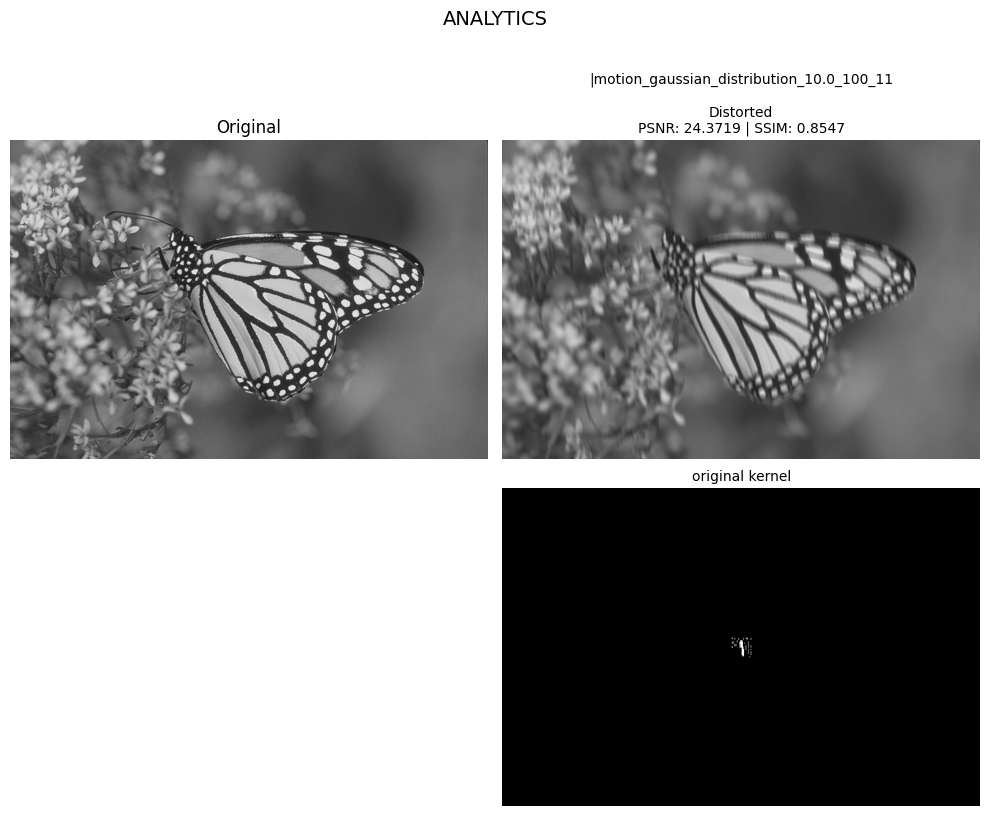

[I 2025-09-27 01:15:12,887] A new study created in memory with name: no-name-64301586-cabe-40b2-9004-6169f12adc98


Oprimizig hyperparameters for fly.jpg


Best trial: 0. Best value: 7.00896:   2%|▏         | 1/50 [01:09<56:56, 69.72s/it, 69.72/3600 seconds]

[I 2025-09-27 01:16:22,609] Trial 0 finished with value: 7.008957697636492 and parameters: {'max_iter': 19, 'gamma': 9.51207163345817, 'lambda1': 14.66667944204696, 'k1': 12.013303835521027, 'lambda2': 16, 'k2': 3.2042909546904323, 'angle': 0.18247504928157415, 'size': 88}. Best is trial 0 with value: 7.008957697636492.


Best trial: 0. Best value: 7.00896:   4%|▍         | 2/50 [01:20<27:51, 34.82s/it, 80.10/3600 seconds]

[I 2025-09-27 01:16:32,993] Trial 1 finished with value: 7.008957697636492 and parameters: {'max_iter': 31, 'gamma': 7.10991852018085, 'lambda1': 0.5096314364864687, 'k1': 19.401206058023686, 'lambda2': 84, 'k2': 4.325548302497695, 'angle': 0.5712199812170323, 'size': 26}. Best is trial 0 with value: 7.008957697636492.


Best trial: 0. Best value: 7.00896:   6%|▌         | 3/50 [01:29<18:11, 23.22s/it, 89.52/3600 seconds]

[I 2025-09-27 01:16:42,417] Trial 2 finished with value: 7.008957697636492 and parameters: {'max_iter': 16, 'gamma': 5.295088673159155, 'lambda1': 8.695705870978102, 'k1': 5.8954598899410335, 'lambda2': 62, 'k2': 2.8759278269756323, 'angle': 0.9177994816238134, 'size': 43}. Best is trial 0 with value: 7.008957697636492.


Best trial: 0. Best value: 7.00896:   8%|▊         | 4/50 [01:37<13:08, 17.15s/it, 97.37/3600 seconds]

[I 2025-09-27 01:16:50,263] Trial 3 finished with value: 7.008877866784827 and parameters: {'max_iter': 23, 'gamma': 7.873242017790835, 'lambda1': 4.073508264951358, 'k1': 10.33326532443087, 'lambda2': 60, 'k2': 1.0243632131279548, 'angle': 1.9086584434598577, 'size': 25}. Best is trial 0 with value: 7.008957697636492.


Best trial: 0. Best value: 7.00896:  10%|█         | 5/50 [01:41<09:19, 12.43s/it, 101.42/3600 seconds]

[I 2025-09-27 01:16:54,314] Trial 4 finished with value: 7.008937467884026 and parameters: {'max_iter': 4, 'gamma': 9.493966818808, 'lambda1': 19.31607745818373, 'k1': 16.187107227517576, 'lambda2': 31, 'k2': 2.0436750687270386, 'angle': 2.1495814494341023, 'size': 50}. Best is trial 0 with value: 7.008957697636492.


Best trial: 0. Best value: 7.00896:  12%|█▏        | 6/50 [01:49<07:59, 10.89s/it, 109.33/3600 seconds]

[I 2025-09-27 01:17:02,217] Trial 5 finished with value: 7.008957697636492 and parameters: {'max_iter': 7, 'gamma': 5.002251410101574, 'lambda1': 0.784331570192846, 'k1': 18.195476001367762, 'lambda2': 26, 'k2': 13.28419345864424, 'angle': 0.9792692266850624, 'size': 57}. Best is trial 0 with value: 7.008957697636492.


Best trial: 0. Best value: 7.00896:  14%|█▍        | 7/50 [03:33<29:34, 41.26s/it, 213.13/3600 seconds]

[I 2025-09-27 01:18:46,019] Trial 6 finished with value: 7.008957697636492 and parameters: {'max_iter': 28, 'gamma': 1.9300591097027178, 'lambda1': 19.394734092514714, 'k1': 15.525143184886177, 'lambda2': 94, 'k2': 17.907064273510212, 'angle': 1.878358181014398, 'size': 93}. Best is trial 0 with value: 7.008957697636492.


Best trial: 0. Best value: 7.00896:  16%|█▌        | 8/50 [03:36<20:30, 29.30s/it, 216.82/3600 seconds]

[I 2025-09-27 01:18:49,714] Trial 7 finished with value: 7.008957697636492 and parameters: {'max_iter': 5, 'gamma': 2.0402303379495375, 'lambda1': 1.0000230493197075, 'k1': 6.5740735821889595, 'lambda2': 39, 'k2': 5.499845732300528, 'angle': 2.603555670506005, 'size': 42}. Best is trial 0 with value: 7.008957697636492.


Best trial: 0. Best value: 7.00896:  18%|█▊        | 9/50 [03:42<14:59, 21.94s/it, 222.58/3600 seconds]

[I 2025-09-27 01:18:55,473] Trial 8 finished with value: 7.008957697636492 and parameters: {'max_iter': 15, 'gamma': 5.47269122326666, 'lambda1': 2.9043920769977767, 'k1': 16.06371991700539, 'lambda2': 8, 'k2': 19.739050038350292, 'angle': 2.4260784939955236, 'size': 28}. Best is trial 0 with value: 7.008957697636492.


Best trial: 9. Best value: 12.3909:  20%|██        | 10/50 [03:43<10:21, 15.54s/it, 223.78/3600 seconds]

[I 2025-09-27 01:18:56,671] Trial 9 finished with value: 12.390851695211381 and parameters: {'max_iter': 1, 'gamma': 8.173068141702858, 'lambda1': 14.166461142567579, 'k1': 14.607242644015646, 'lambda2': 78, 'k2': 1.5734885695083982, 'angle': 1.1261532993583998, 'size': 20}. Best is trial 9 with value: 12.390851695211381.


d:\for_proga\franework_deconvolution\framework (8)\algorithms\HQMotionBlurRestoration\deblur.py:167: RuntimeWarning: invalid value encountered in divide
  L_star = L_nominator / L_denominator
d:\for_proga\franework_deconvolution\framework (8)\algorithms\HQMotionBlurRestoration\helpers.py:31: RuntimeWarning: invalid value encountered in cast
  image = np.clip(image, 0, 255).astype(np.uint8)
d:\for_proga\franework_deconvolution\framework (8)\algorithms\HQMotionBlurRestoration\HQMBR.py:90: RuntimeWarning: invalid value encountered in cast
  L = np.round(L).astype(np.int16)
Best trial: 9. Best value: 12.3909:  22%|██▏       | 11/50 [03:56<09:36, 14.77s/it, 236.81/3600 seconds]

[I 2025-09-27 01:19:09,699] Trial 10 finished with value: -inf and parameters: {'max_iter': 48, 'gamma': 0.15937211126259143, 'lambda1': 12.86496093183803, 'k1': 0.45744132473491206, 'lambda2': 76, 'k2': 8.443634433739373, 'angle': 3.0152087245925268, 'size': 11}. Best is trial 9 with value: 12.390851695211381.


Best trial: 9. Best value: 12.3909:  24%|██▍       | 12/50 [05:33<25:08, 39.70s/it, 333.54/3600 seconds]

[I 2025-09-27 01:20:46,427] Trial 11 finished with value: 7.008957697636492 and parameters: {'max_iter': 40, 'gamma': 9.95342011003747, 'lambda1': 14.395769604620874, 'k1': 11.890715623052373, 'lambda2': 3, 'k2': 7.961844318827218, 'angle': 0.17042849903009896, 'size': 81}. Best is trial 9 with value: 12.390851695211381.


Best trial: 9. Best value: 12.3909:  26%|██▌       | 13/50 [05:59<21:58, 35.64s/it, 359.82/3600 seconds]

[I 2025-09-27 01:21:12,708] Trial 12 finished with value: 7.008942470934272 and parameters: {'max_iter': 15, 'gamma': 8.01745237387563, 'lambda1': 15.277650932297522, 'k1': 12.870231845613397, 'lambda2': 49, 'k2': 0.2699799580879003, 'angle': 1.472480872357241, 'size': 71}. Best is trial 9 with value: 12.390851695211381.


Best trial: 9. Best value: 12.3909:  28%|██▊       | 14/50 [08:18<40:03, 66.75s/it, 498.46/3600 seconds]

[I 2025-09-27 01:23:31,351] Trial 13 finished with value: 7.008957697636492 and parameters: {'max_iter': 36, 'gamma': 8.685387532072296, 'lambda1': 9.67764101002385, 'k1': 7.441310575746991, 'lambda2': 18, 'k2': 13.251028933316508, 'angle': 0.02372233586506356, 'size': 95}. Best is trial 9 with value: 12.390851695211381.


Best trial: 9. Best value: 12.3909:  30%|███       | 15/50 [08:56<33:51, 58.05s/it, 536.33/3600 seconds]

[I 2025-09-27 01:24:09,226] Trial 14 finished with value: 7.008957697636492 and parameters: {'max_iter': 23, 'gamma': 6.667723643258628, 'lambda1': 16.210620475226975, 'k1': 13.74154170176579, 'lambda2': 73, 'k2': 6.138581387682304, 'angle': 1.2473007438842463, 'size': 70}. Best is trial 9 with value: 12.390851695211381.


Best trial: 9. Best value: 12.3909:  32%|███▏      | 16/50 [09:00<23:37, 41.69s/it, 540.03/3600 seconds]

[I 2025-09-27 01:24:12,925] Trial 15 finished with value: 7.008957697636492 and parameters: {'max_iter': 11, 'gamma': 9.013851536486417, 'lambda1': 11.220091802561958, 'k1': 9.479587731214226, 'lambda2': 46, 'k2': 11.912422634192236, 'angle': 0.6070157853458192, 'size': 10}. Best is trial 9 with value: 12.390851695211381.


Best trial: 9. Best value: 12.3909:  34%|███▍      | 17/50 [09:04<16:43, 30.42s/it, 544.26/3600 seconds]

[I 2025-09-27 01:24:17,150] Trial 16 finished with value: 7.430753059987616 and parameters: {'max_iter': 1, 'gamma': 6.440235798918581, 'lambda1': 6.477476586047479, 'k1': 9.903407485715283, 'lambda2': 98, 'k2': 3.6323132008802075, 'angle': 0.605786392663448, 'size': 79}. Best is trial 9 with value: 12.390851695211381.


Best trial: 9. Best value: 12.3909:  36%|███▌      | 18/50 [09:07<11:52, 22.26s/it, 547.51/3600 seconds]

[I 2025-09-27 01:24:20,398] Trial 17 finished with value: 7.9311645767330985 and parameters: {'max_iter': 1, 'gamma': 3.9547681916287156, 'lambda1': 6.626907897222399, 'k1': 3.742356756723762, 'lambda2': 100, 'k2': 6.896846889216297, 'angle': 0.6756400845382002, 'size': 64}. Best is trial 9 with value: 12.390851695211381.


Best trial: 9. Best value: 12.3909:  38%|███▊      | 19/50 [09:10<08:27, 16.38s/it, 550.21/3600 seconds]

[I 2025-09-27 01:24:23,104] Trial 18 finished with value: 7.811827465955904 and parameters: {'max_iter': 1, 'gamma': 3.8529684947978833, 'lambda1': 6.511898935399593, 'k1': 1.8765833605918807, 'lambda2': 86, 'k2': 10.01616981118033, 'angle': 1.1597723272472158, 'size': 60}. Best is trial 9 with value: 12.390851695211381.


Best trial: 9. Best value: 12.3909:  40%|████      | 20/50 [09:15<06:34, 13.15s/it, 555.82/3600 seconds]

[I 2025-09-27 01:24:28,716] Trial 19 finished with value: 7.008957697636492 and parameters: {'max_iter': 11, 'gamma': 3.67072405035501, 'lambda1': 7.602219818250926, 'k1': 3.5793124587397465, 'lambda2': 65, 'k2': 7.047168949853069, 'angle': 1.4927170908769898, 'size': 37}. Best is trial 9 with value: 12.390851695211381.


Best trial: 9. Best value: 12.3909:  42%|████▏     | 21/50 [09:29<06:30, 13.46s/it, 569.99/3600 seconds]

[I 2025-09-27 01:24:42,883] Trial 20 finished with value: 7.008957697636492 and parameters: {'max_iter': 9, 'gamma': 3.507964494319818, 'lambda1': 11.203123364588038, 'k1': 4.107136056365367, 'lambda2': 100, 'k2': 9.806403710374342, 'angle': 0.7360172123037003, 'size': 67}. Best is trial 9 with value: 12.390851695211381.


Best trial: 9. Best value: 12.3909:  44%|████▍     | 22/50 [09:32<04:43, 10.13s/it, 572.38/3600 seconds]

[I 2025-09-27 01:24:45,269] Trial 21 finished with value: 7.9835514517234305 and parameters: {'max_iter': 1, 'gamma': 4.094681377800124, 'lambda1': 4.1364312304910555, 'k1': 1.0866729519821097, 'lambda2': 88, 'k2': 11.338135010369488, 'angle': 1.253204137625451, 'size': 57}. Best is trial 9 with value: 12.390851695211381.


Best trial: 9. Best value: 12.3909:  46%|████▌     | 23/50 [09:34<03:29,  7.74s/it, 574.54/3600 seconds]

[I 2025-09-27 01:24:47,435] Trial 22 finished with value: 8.213370231796425 and parameters: {'max_iter': 1, 'gamma': 2.8501902941565285, 'lambda1': 4.204655031018734, 'k1': 0.10367748838158108, 'lambda2': 87, 'k2': 15.88059651076583, 'angle': 1.2599669927997754, 'size': 52}. Best is trial 9 with value: 12.390851695211381.


Best trial: 9. Best value: 12.3909:  48%|████▊     | 24/50 [09:39<03:02,  7.04s/it, 579.94/3600 seconds]

[I 2025-09-27 01:24:52,828] Trial 23 finished with value: 8.055262649987926 and parameters: {'max_iter': 6, 'gamma': 2.302150006491191, 'lambda1': 3.5881922946753964, 'k1': 0.20488578004504937, 'lambda2': 85, 'k2': 14.53869257341032, 'angle': 1.284087556878942, 'size': 50}. Best is trial 9 with value: 12.390851695211381.


Best trial: 9. Best value: 12.3909:  50%|█████     | 25/50 [09:46<02:48,  6.76s/it, 586.04/3600 seconds]

[I 2025-09-27 01:24:58,936] Trial 24 finished with value: 4.3443857811555056 and parameters: {'max_iter': 7, 'gamma': 2.2498181336338616, 'lambda1': 3.105546820762254, 'k1': 0.3462939779284842, 'lambda2': 77, 'k2': 16.62045808531713, 'angle': 1.4458165000264378, 'size': 50}. Best is trial 9 with value: 12.390851695211381.


Best trial: 9. Best value: 12.3909:  52%|█████▏    | 26/50 [09:49<02:21,  5.91s/it, 589.96/3600 seconds]

[I 2025-09-27 01:25:02,852] Trial 25 finished with value: 7.008957697636492 and parameters: {'max_iter': 11, 'gamma': 1.0169151474964138, 'lambda1': 4.908479376385962, 'k1': 2.1277466423209073, 'lambda2': 73, 'k2': 15.144464154135253, 'angle': 1.7447995231649949, 'size': 20}. Best is trial 9 with value: 12.390851695211381.


Best trial: 9. Best value: 12.3909:  54%|█████▍    | 27/50 [09:53<01:58,  5.13s/it, 593.29/3600 seconds]

[I 2025-09-27 01:25:06,182] Trial 26 finished with value: 7.008957697636492 and parameters: {'max_iter': 5, 'gamma': 2.5409514855934043, 'lambda1': 17.62932893398307, 'k1': 8.303829964056554, 'lambda2': 89, 'k2': 15.230499925199842, 'angle': 1.0590683331863617, 'size': 39}. Best is trial 9 with value: 12.390851695211381.


Best trial: 9. Best value: 12.3909:  56%|█████▌    | 28/50 [10:01<02:13,  6.05s/it, 601.47/3600 seconds]

[I 2025-09-27 01:25:14,361] Trial 27 finished with value: 7.008957697636492 and parameters: {'max_iter': 19, 'gamma': 2.813428419054211, 'lambda1': 12.967840798177972, 'k1': 4.766333384222308, 'lambda2': 68, 'k2': 19.269956074178857, 'angle': 1.7561122741370392, 'size': 34}. Best is trial 9 with value: 12.390851695211381.


Best trial: 9. Best value: 12.3909:  58%|█████▊    | 29/50 [10:06<01:58,  5.63s/it, 606.13/3600 seconds]

[I 2025-09-27 01:25:19,024] Trial 28 finished with value: 7.008957697636492 and parameters: {'max_iter': 5, 'gamma': 1.3405475163168326, 'lambda1': 2.124380171831003, 'k1': 2.51703035559403, 'lambda2': 57, 'k2': 15.330880149793922, 'angle': 2.1116825782169872, 'size': 49}. Best is trial 9 with value: 12.390851695211381.


Best trial: 9. Best value: 12.3909:  60%|██████    | 30/50 [10:10<01:43,  5.17s/it, 610.22/3600 seconds]

[I 2025-09-27 01:25:23,110] Trial 29 finished with value: 7.008957697636492 and parameters: {'max_iter': 12, 'gamma': 0.2873298145958061, 'lambda1': 4.784827855905187, 'k1': 14.062506577268367, 'lambda2': 78, 'k2': 17.016138501294094, 'angle': 1.3197101987723885, 'size': 17}. Best is trial 9 with value: 12.390851695211381.


Best trial: 9. Best value: 12.3909:  62%|██████▏   | 31/50 [10:14<01:31,  4.81s/it, 614.20/3600 seconds]

[I 2025-09-27 01:25:27,096] Trial 30 finished with value: 7.008957697636492 and parameters: {'max_iter': 8, 'gamma': 1.2827314019505234, 'lambda1': 8.785868453306389, 'k1': 11.612371602173772, 'lambda2': 82, 'k2': 13.030663225674994, 'angle': 0.3879202071471357, 'size': 33}. Best is trial 9 with value: 12.390851695211381.


Best trial: 9. Best value: 12.3909:  64%|██████▍   | 32/50 [10:16<01:12,  4.05s/it, 616.47/3600 seconds]

[I 2025-09-27 01:25:29,359] Trial 31 finished with value: 7.565087332275574 and parameters: {'max_iter': 1, 'gamma': 4.715910098110265, 'lambda1': 4.769325978750747, 'k1': 0.14439411569333999, 'lambda2': 90, 'k2': 12.013355211725973, 'angle': 0.8783114834510253, 'size': 55}. Best is trial 9 with value: 12.390851695211381.


Best trial: 9. Best value: 12.3909:  66%|██████▌   | 33/50 [10:19<01:03,  3.76s/it, 619.56/3600 seconds]

[I 2025-09-27 01:25:32,455] Trial 32 finished with value: 7.068536389721805 and parameters: {'max_iter': 3, 'gamma': 3.0972594756134355, 'lambda1': 2.2927360099872987, 'k1': 1.330607349899088, 'lambda2': 84, 'k2': 11.338772279427733, 'angle': 1.2094393605782772, 'size': 46}. Best is trial 9 with value: 12.390851695211381.


Best trial: 9. Best value: 12.3909:  68%|██████▊   | 34/50 [10:29<01:31,  5.69s/it, 629.76/3600 seconds]

[I 2025-09-27 01:25:42,656] Trial 33 finished with value: 7.008957697636492 and parameters: {'max_iter': 4, 'gamma': 4.473085369048956, 'lambda1': 5.869639627863016, 'k1': 5.422461143472864, 'lambda2': 93, 'k2': 14.05472940984147, 'angle': 1.648386965682235, 'size': 77}. Best is trial 9 with value: 12.390851695211381.


Best trial: 9. Best value: 12.3909:  70%|███████   | 35/50 [10:38<01:38,  6.60s/it, 638.47/3600 seconds]

[I 2025-09-27 01:25:51,364] Trial 34 finished with value: 7.008957697636492 and parameters: {'max_iter': 9, 'gamma': 5.50001993268755, 'lambda1': 3.850818667386421, 'k1': 19.97008408223347, 'lambda2': 69, 'k2': 10.719065381560645, 'angle': 0.8065482226228724, 'size': 54}. Best is trial 9 with value: 12.390851695211381.


Best trial: 9. Best value: 12.3909:  72%|███████▏  | 36/50 [10:59<02:32, 10.91s/it, 659.44/3600 seconds]

[I 2025-09-27 01:26:12,329] Trial 35 finished with value: 7.008957697636492 and parameters: {'max_iter': 17, 'gamma': 3.1632876803142933, 'lambda1': 7.663964884472889, 'k1': 2.538451988290943, 'lambda2': 82, 'k2': 16.73171267067748, 'angle': 0.406399203836572, 'size': 62}. Best is trial 9 with value: 12.390851695211381.


Best trial: 9. Best value: 12.3909:  74%|███████▍  | 37/50 [11:02<01:51,  8.55s/it, 662.50/3600 seconds]

[I 2025-09-27 01:26:15,390] Trial 36 finished with value: 7.008957697636492 and parameters: {'max_iter': 6, 'gamma': 6.222508391392896, 'lambda1': 1.6503691163963818, 'k1': 18.35875349881388, 'lambda2': 93, 'k2': 9.120143374928238, 'angle': 0.9512046044115177, 'size': 30}. Best is trial 9 with value: 12.390851695211381.


Best trial: 9. Best value: 12.3909:  76%|███████▌  | 38/50 [11:10<01:39,  8.33s/it, 670.31/3600 seconds]

[I 2025-09-27 01:26:23,206] Trial 37 finished with value: 7.008957697636492 and parameters: {'max_iter': 13, 'gamma': 4.208868018541005, 'lambda1': 0.236043707171536, 'k1': 1.36322720570347, 'lambda2': 87, 'k2': 14.375952065798934, 'angle': 1.107884760925334, 'size': 43}. Best is trial 9 with value: 12.390851695211381.


Best trial: 9. Best value: 12.3909:  78%|███████▊  | 39/50 [11:18<01:29,  8.16s/it, 678.06/3600 seconds]

[I 2025-09-27 01:26:30,951] Trial 38 finished with value: 7.008957697636492 and parameters: {'max_iter': 23, 'gamma': 7.514149821521724, 'lambda1': 3.570459335738278, 'k1': 3.2773529766625646, 'lambda2': 56, 'k2': 18.389455314059823, 'angle': 1.3308237050246934, 'size': 24}. Best is trial 9 with value: 12.390851695211381.


Best trial: 9. Best value: 12.3909:  80%|████████  | 40/50 [11:22<01:10,  7.02s/it, 682.43/3600 seconds]

[I 2025-09-27 01:26:35,318] Trial 39 finished with value: 7.00945415335998 and parameters: {'max_iter': 3, 'gamma': 4.984321061043776, 'lambda1': 17.78352519957699, 'k1': 6.418994814260218, 'lambda2': 80, 'k2': 1.6460684113010249, 'angle': 1.9551335113666337, 'size': 56}. Best is trial 9 with value: 12.390851695211381.


Best trial: 9. Best value: 12.3909:  82%|████████▏ | 41/50 [12:21<03:22, 22.52s/it, 741.12/3600 seconds]

[I 2025-09-27 01:27:34,013] Trial 40 finished with value: 7.008957697636492 and parameters: {'max_iter': 31, 'gamma': 1.7042333579432851, 'lambda1': 5.292730888242605, 'k1': 17.753779193797918, 'lambda2': 94, 'k2': 16.181426525168167, 'angle': 1.6709285231125257, 'size': 74}. Best is trial 9 with value: 12.390851695211381.


Best trial: 9. Best value: 12.3909:  84%|████████▍ | 42/50 [12:24<02:13, 16.72s/it, 744.31/3600 seconds]

[I 2025-09-27 01:27:37,199] Trial 41 finished with value: 7.823117498429104 and parameters: {'max_iter': 1, 'gamma': 4.0192819254003, 'lambda1': 7.323740567770451, 'k1': 1.1784173366252344, 'lambda2': 100, 'k2': 3.1048251599717522, 'angle': 0.711321747094833, 'size': 64}. Best is trial 9 with value: 12.390851695211381.


Best trial: 9. Best value: 12.3909:  86%|████████▌ | 43/50 [12:27<01:29, 12.76s/it, 747.81/3600 seconds]

[I 2025-09-27 01:27:40,704] Trial 42 finished with value: 7.0090847911174095 and parameters: {'max_iter': 3, 'gamma': 5.776777707277409, 'lambda1': 4.142773325172509, 'k1': 3.0819880880374515, 'lambda2': 89, 'k2': 6.183066769736717, 'angle': 1.0029285942898165, 'size': 51}. Best is trial 9 with value: 12.390851695211381.


Best trial: 9. Best value: 12.3909:  88%|████████▊ | 44/50 [12:51<01:36, 16.15s/it, 771.89/3600 seconds]

[I 2025-09-27 01:28:04,778] Trial 43 finished with value: 7.008957697636492 and parameters: {'max_iter': 8, 'gamma': 3.3209922706567965, 'lambda1': 6.382640161543857, 'k1': 4.330308614870869, 'lambda2': 96, 'k2': 4.554843186317597, 'angle': 1.4217422124169117, 'size': 85}. Best is trial 9 with value: 12.390851695211381.


Best trial: 9. Best value: 12.3909:  90%|█████████ | 45/50 [14:03<02:43, 32.67s/it, 843.10/3600 seconds]

[I 2025-09-27 01:29:15,988] Trial 44 finished with value: 7.5191324682797305 and parameters: {'max_iter': 50, 'gamma': 4.518495897722762, 'lambda1': 1.1546765110206985, 'k1': 0.9470832967827206, 'lambda2': 73, 'k2': 12.277780549249226, 'angle': 0.4361053112472647, 'size': 67}. Best is trial 9 with value: 12.390851695211381.


Best trial: 45. Best value: 15.4034:  92%|█████████▏| 46/50 [14:06<01:35, 23.75s/it, 846.05/3600 seconds]

[I 2025-09-27 01:29:18,940] Trial 45 finished with value: 15.403394222406572 and parameters: {'max_iter': 3, 'gamma': 2.668313073261971, 'lambda1': 8.693694719498255, 'k1': 0.18514101584705278, 'lambda2': 91, 'k2': 8.515031603925074, 'angle': 0.8828705093223471, 'size': 45}. Best is trial 45 with value: 15.403394222406572.


Best trial: 45. Best value: 15.4034:  94%|█████████▍| 47/50 [14:10<00:53, 18.00s/it, 850.62/3600 seconds]

[I 2025-09-27 01:29:23,512] Trial 46 finished with value: 7.008957697636492 and parameters: {'max_iter': 6, 'gamma': 2.5477111043952156, 'lambda1': 13.061247744474205, 'k1': 14.737263306341928, 'lambda2': 35, 'k2': 17.93480917609296, 'angle': 1.0951400776327318, 'size': 45}. Best is trial 45 with value: 15.403394222406572.


Best trial: 47. Best value: 15.6398:  96%|█████████▌| 48/50 [14:28<00:35, 17.83s/it, 868.05/3600 seconds]

[I 2025-09-27 01:29:40,946] Trial 47 finished with value: 15.63976357062585 and parameters: {'max_iter': 3, 'gamma': 1.9791572333751448, 'lambda1': 10.219768011676518, 'k1': 0.21598309682314384, 'lambda2': 84, 'k2': 14.19946380161117, 'angle': 0.8923410459147716, 'size': 100}. Best is trial 47 with value: 15.63976357062585.


Best trial: 47. Best value: 15.6398:  98%|█████████▊| 49/50 [15:52<00:37, 37.76s/it, 952.31/3600 seconds]

[I 2025-09-27 01:31:05,197] Trial 48 finished with value: -inf and parameters: {'max_iter': 19, 'gamma': 0.7404360505743899, 'lambda1': 11.014835732943165, 'k1': 0.16164146761798404, 'lambda2': 82, 'k2': 13.817653084874985, 'angle': 0.8512857838482415, 'size': 99}. Best is trial 47 with value: 15.63976357062585.


Best trial: 47. Best value: 15.6398: 100%|██████████| 50/50 [16:12<00:00, 19.45s/it, 972.71/3600 seconds]


[I 2025-09-27 01:31:25,601] Trial 49 finished with value: 7.008884827453877 and parameters: {'max_iter': 44, 'gamma': 1.7706804686693247, 'lambda1': 9.848749994296744, 'k1': 2.0364677194170313, 'lambda2': 64, 'k2': 0.4409607943592251, 'angle': 0.25503631267365323, 'size': 39}. Best is trial 47 with value: 15.63976357062585.
Optimization completed:
   Best PSNR: 15.6398
   Best params: {'max_iter': 3, 'gamma': 1.9791572333751448, 'lambda1': 10.219768011676518, 'k1': 0.21598309682314384, 'lambda2': 84, 'k2': 14.19946380161117, 'angle': 0.8923410459147716, 'size': 100}
   Number of tests: 50
Best params:
   max_iter: 3
   gamma: 1.9791572333751448
   lambda1: 10.219768011676518
   k1: 0.21598309682314384
   lambda2: 84
   k2: 14.19946380161117
123
Error calculating SSIM: win_size exceeds image extent. Either ensure that your images are at least 7x7; or pass win_size explicitly in the function call, with an odd value less than or equal to the smaller side of your images. If your images are

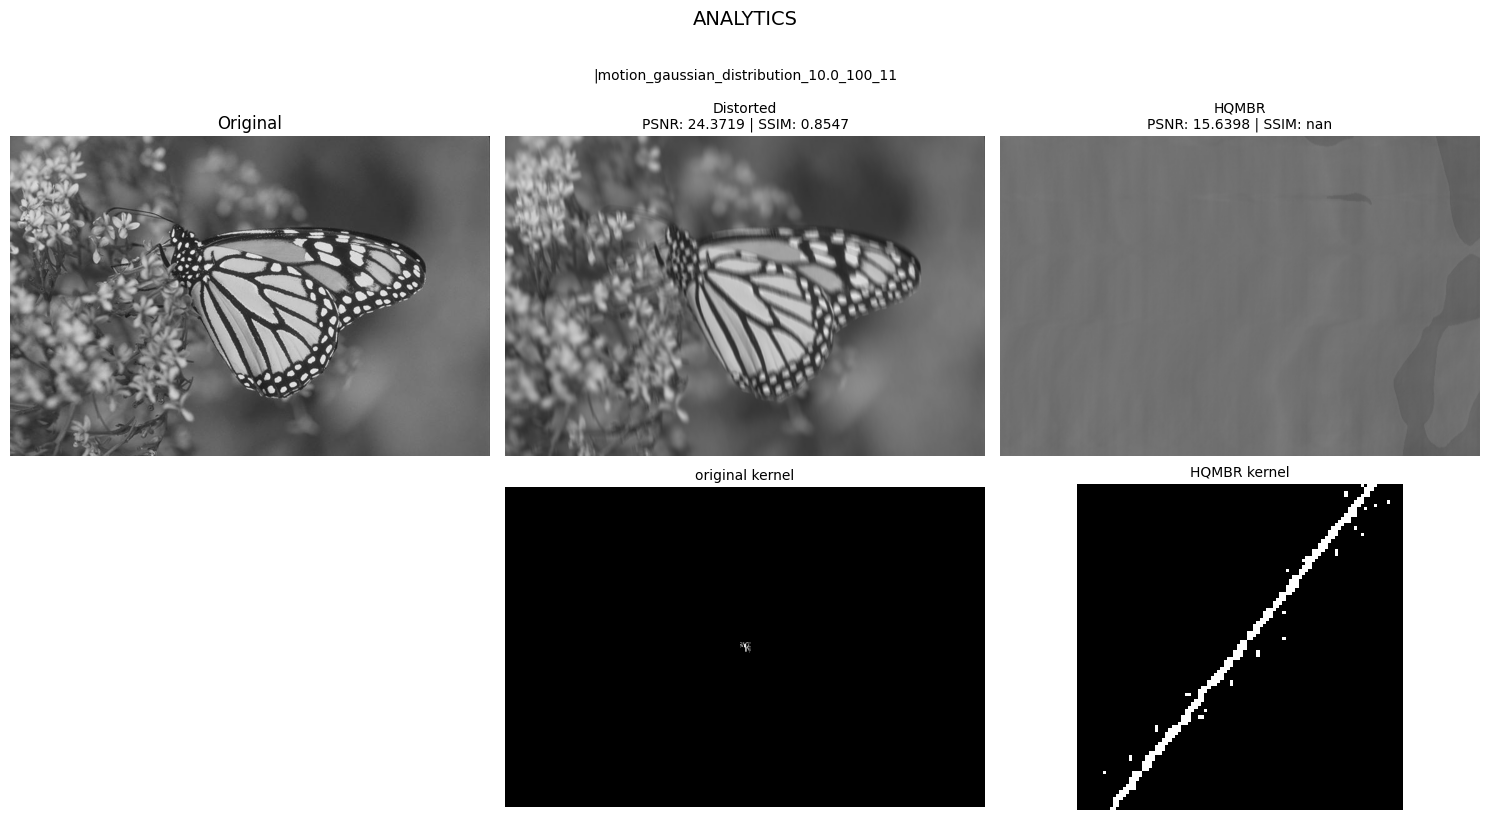

In [12]:
# param = {'max_iter': np.array(range(1,2)),
#         'gamma': np.arange(0.5, 4, 0.5),
#         'lambda1':np.arange(0.1, 0.5, 0.01),
#         'k1': np.arange(1.0, 1.4, 0.05),
#         'lambda2': np.arange(10, 25, 1),
#         'k2': np.arange(1.0, 2.0,0.1)}

# param = {'max_iter': [1,5],
#         'gamma': [2],
#         'lambda1':[0.5],
#         'k1': [1.1],
#         'lambda2': [10,25],
#         'k2': [1.5]}

# param = {'max_iter': [1, 5],
#         'gamma': [2, 3],
#         'lambda1':[0.5, 1],
#         'k1': [1.1, 1.3],
#         'lambda2': [10, 25],
#         'k2': [1.5, 2]}
#tmp.process_GRID_SEARCH(algorithm_processor=alg_hqmbr, grid=param, n_trials = None)

tmp.filter(fl9)
tmp.show(size=1.0, kernel_intencity_scale=100.0,kernel_size=0.5)

param_ranges = {
    'max_iter': (1, 50),      # от 1 до 5
    'gamma': (0.1, 10.0),         # от 2 до 3
    'lambda1': (0.1, 20.0),     # от 0.5 до 1
    'k1': (0.1, 20.0),        # от 1.1 до 1.3
    'lambda2': (1, 100),     # от 10 до 25
    'k2': (0.1, 20.0),           # от 1.5 до 2
    'angle': (0.0, np.pi),
    'size': (10, 100)
} 
tmp.process_hyperparameter_optimization(
    algorithm_processor=alg_hqmbr, 
    param_ranges=param_ranges, 
    n_trials=50,
    timeout=3600
)
tmp.show(size=1.0, kernel_intencity_scale=255.0)


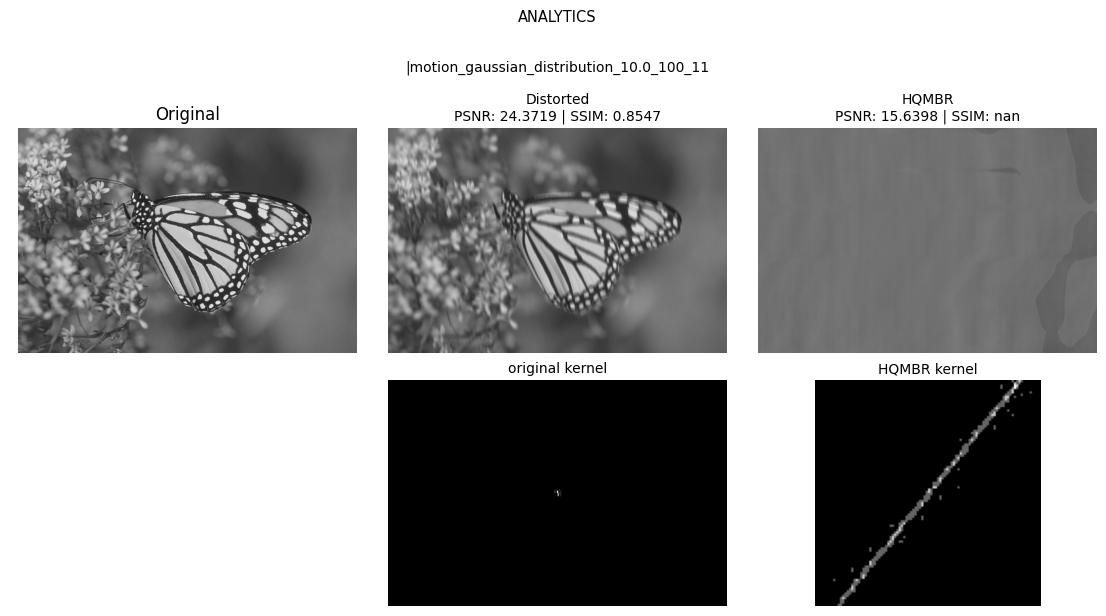

In [13]:
# alg_hqmbr.change_param({'max_iter': 1, 'gamma': 7.0886046230956605, 'lambda1': 6.674629278883548, 'k1': 3.05509854110168, 'lambda2': 10, 'k2': 3.2288110156309, 'angle': 3.045158600764045, 'size': 13})
# tmp.process(alg_hqmbr)
tmp.show(size=0.75, kernel_intencity_scale=100.0,kernel_size=1.0)
# tmp.show(size=0.75,kernel_intencity_scale=1000.0)

In [14]:
arr = np.array([1,2,3,4])
print(arr[0:-0])

[]


In [15]:
# arr = [[1,2],[3,4]]
# arr2 = np.atleast_3d(np.array(arr,dtype=np.int16))
# print(arr2)
# print(len(tmp.images))
# tmp.show()

In [16]:
# tmp.full_process([fl8],[alg_hqmbr])
# tmp.full_process([fl8],[alg_map, alg_hqmbr, alg_rl])
# tmp.full_process([fl8],[alg_hqmbr])

# tmp.full_process([],[alg_map])
# tmp.process(alg_hqmbr)


# tmp.full_process([[fl9, fl8],[fl9,fl1]],[alg_hqmbr],size=0.6,kernel_intencity_scale=15.0)
# tmp.show(size = 1.0)

In [17]:
# tmp.full_process([[fl8,fl4,fl1]],[alg_test3],size=1.0,kernel_intencity_scale=15.0) #пайплайн из наложения смазов и восстановления заданными методами, нахождение лучшего и худшего и их вывод

In [18]:
a = [ i[0] for i in tmp.get_metrics()] # получить метрики в массиве (если надо будет)

print([i for i in enumerate(a)])

print(max( [max(i) for i in a ]))

[(0, 'i'), (1, 'b'), (2, 'a'), (3, 'p'), (4, 's')]
s


In [19]:
# tmp.clear_output() #удаляет все привязанные отфильрованные и восстановленные картинки
# tmp.reset() #в теории убирает привязку к отфильтрованным и восстановленным картинкам
# tmp.clear_input() #убирает привязку ко всем загруженным картинкам (загружать надо заново)


In [20]:
tmp.clear_output_directory() # УДАЛЯЕТ ВООБЩЕ ВСЕ из директорий с отфильрованными и восстановленными картинками + reset()

Deleted: blured\12084.png
Deleted: blured\3096.png
Deleted: blured\3096_1.png
Deleted: blured\fly.jpg
Deleted: blured\fly_1.jpg
Deleted: blured\kernel_12084.png
Deleted: blured\kernel_3096.png
Deleted: blured\kernel_3096_1.png
Deleted: blured\kernel_fly.jpg
Deleted: blured\kernel_fly_1.jpg
Deleted: restored\0.png
Deleted: restored\1.png
Deleted: restored\10.png
Deleted: restored\11.png
Deleted: restored\12.png
Deleted: restored\12084_HQMBR_optimized.png
Deleted: restored\12084_HQMBR_optimized_kernel.png
Deleted: restored\13.png
Deleted: restored\14.png
Deleted: restored\15.png
Deleted: restored\16.png
Deleted: restored\17.png
Deleted: restored\18.png
Deleted: restored\19.png
Deleted: restored\2.png
Deleted: restored\20.png
Deleted: restored\21.png
Deleted: restored\22.png
Deleted: restored\23.png
Deleted: restored\24.png
Deleted: restored\25.png
Deleted: restored\26.png
Deleted: restored\27.png
Deleted: restored\28.png
Deleted: restored\29.png
Deleted: restored\3.png
Deleted: restored\

In [21]:
# from algorithms.shan.shan import ShanAlgorithm
# tmp.full_process([[fl9, fl8],[fl9,fl1]],[ShanAlgorithm()],size=0.5,kernel_intencity_scale=15.0)

# Разовое тестирование алгосов

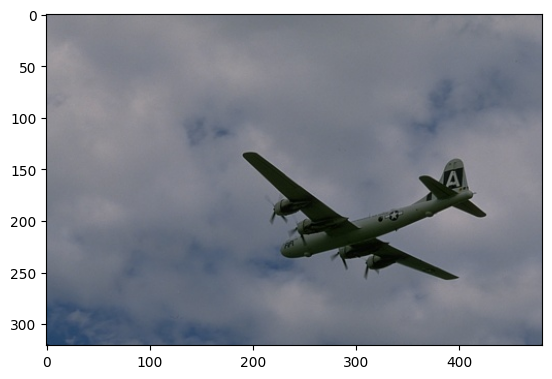

In [4]:
import matplotlib.pyplot as plt

img = cv.imread("images/3096.png",cv.IMREAD_COLOR)

plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))

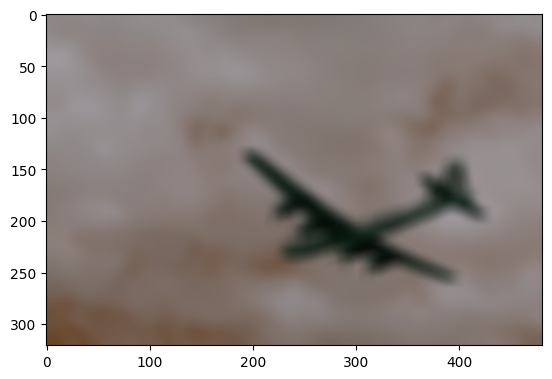

In [5]:
filtered = fl8.filter(img)

plt.imshow(filtered, cmap='gray')

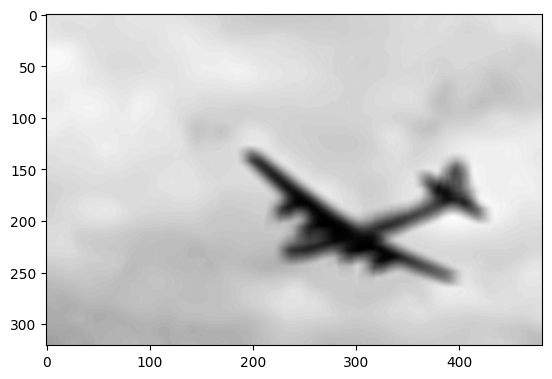

In [7]:
from algorithms.idiap_semiblindpsfdeconv import IdiapSemiblindpsfdeconv

arr,_ = IdiapSemiblindpsfdeconv(iterations=2).process(filtered)

plt.imshow(arr, cmap='gray')

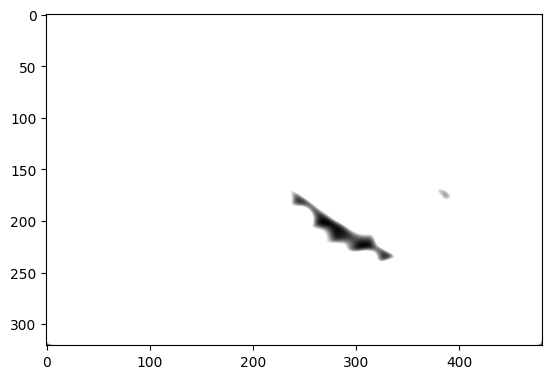

In [8]:
from algorithms.JohnRagland_Total_Variation_MATLAB_implementation import JohnRaglandTotalVariationMATLABImplementation

arr,_ = JohnRaglandTotalVariationMATLABImplementation().process(filtered)

plt.imshow(arr, cmap='gray')

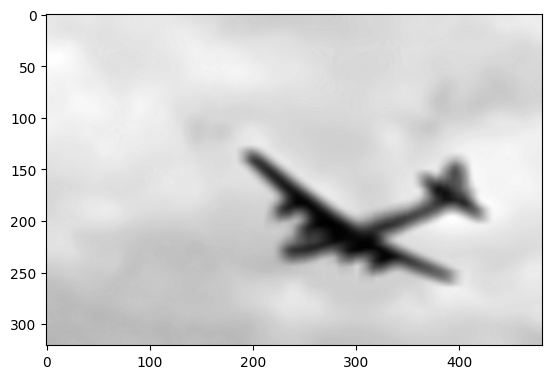

In [9]:
from algorithms.zalteck_BCDTV import ZalteckBCDTV

arr,_ = ZalteckBCDTV(max_iterations=3).process(filtered)

plt.imshow(arr, cmap='gray')

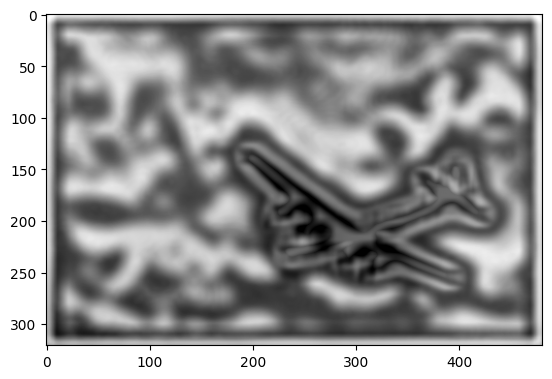

In [10]:
from algorithms.COR_OPT_RobustBlindDeconv import COROPTRobustBlindDeconv

arr,_ = COROPTRobustBlindDeconv(iterations=2).process(filtered)

plt.imshow(arr, cmap='gray')

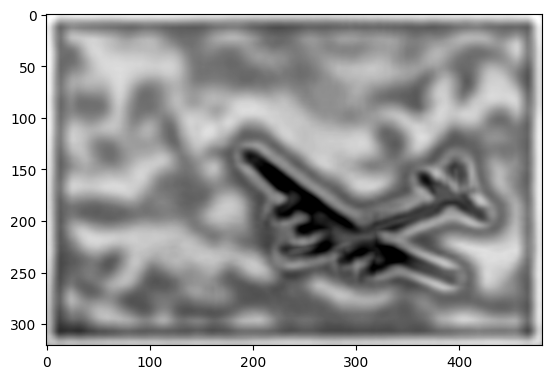

In [6]:
from algorithms.crewleader_BlindDeconvolutionLowRank import CrewleaderBlindDeconvolutionLowRank

arr,_ = CrewleaderBlindDeconvolutionLowRank(iterations=2).process(filtered)

plt.imshow(arr, cmap='gray')

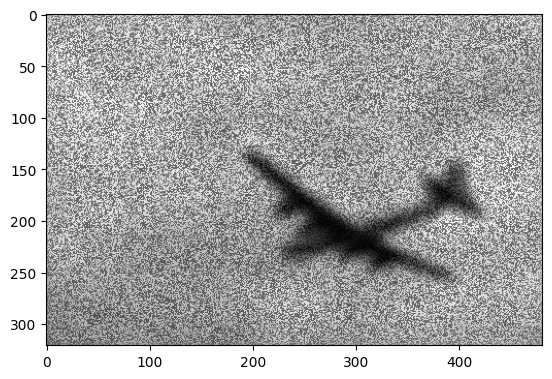

In [7]:
from algorithms.CACTuS_AI_Blind_Deconvolution_using_Modulated_Inputs import CACTuSAIBlindDeconvolutionUsingModulatedInputs

arr,_ = CACTuSAIBlindDeconvolutionUsingModulatedInputs(iterations=2).process(filtered)

plt.imshow(arr, cmap='gray')

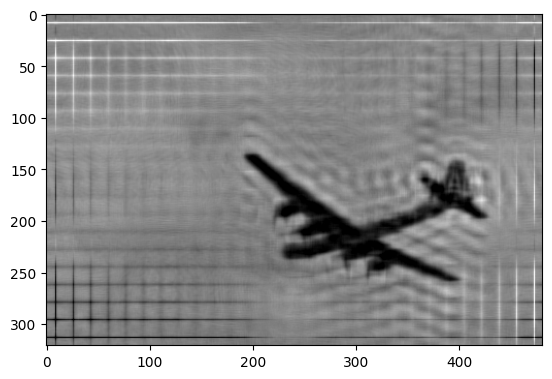

In [8]:
from algorithms.qingqu06_MCS_BD import Qingqu06MCSBD 

arr,_ = Qingqu06MCSBD(iterations=5).process(filtered)

plt.imshow(arr, cmap='gray')

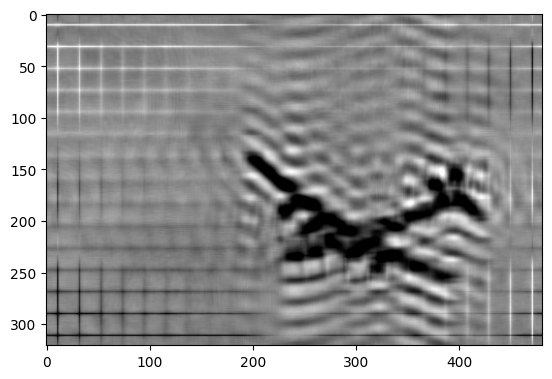

In [9]:
from algorithms.lisiyaoATbnu_low_rank_kernel import LisiyaoATbnuLowRankKernel 

arr,_ = LisiyaoATbnuLowRankKernel(iterations=2).process(filtered)

plt.imshow(arr, cmap='gray')

In [ ]:
from algorithms. import  

arr,_ = (iterations=2).process(filtered)

plt.imshow(arr, cmap='gray')

In [ ]:
from algorithms.antonbezzaborov_blind_deconvolution import Antonbezzaborov_Blind_Deconvolution

arr,_ = Antonbezzaborov_Blind_Deconvolution().process(filtered)

plt.imshow(arr, cmap='gray')